在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [2]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

# with open('enrollments.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     enrollments = list(reader)
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv("daily-engagement.csv")
project_submissions = read_csv("project-submissions.csv")
print daily_engagement[0]
print project_submissions[0]


import pandas as pd
engagement = pd.read_csv('daily-engagement.csv')
len(engagement['acct'].unique())

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


1237

## 修正数据类型

In [5]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型
enrollments = read_csv("./enrollments.csv")

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

## 数据中的问题

In [8]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']


In [9]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
def unique_studetns(data):
    result = set()
    for value in data:
        result.add(value['account_key'])
    return result

enrollment_num_rows = len(enrollments)            
print enrollment_num_rows
enrollment_num_unique_students = len(unique_studetns(enrollments))
print enrollment_num_unique_students

engagement_num_rows = len(daily_engagement)
print engagement_num_rows
engagement_num_unique_students = len(unique_studetns(daily_engagement))
print engagement_num_unique_students

submission_num_rows = len(project_submissions)
print submission_num_rows
submission_num_unique_students = len(project_submissions)
print submission_num_unique_students


1640
1302
136240
1237
3642
3642


## 缺失的互动（Engagement）记录

In [10]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。

unique_engagement_students = unique_studetns(daily_engagement)
unique_enrollments = unique_studetns(enrollments)
for value in enrollments:
    if value['account_key'] not in unique_engagement_students:
        print value

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 1

## 检查更多的问题记录

In [11]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
unique_engagement_students = unique_studetns(daily_engagement)
unique_enrollments = unique_studetns(enrollments)
num_problem_students = 0
for value in enrollments:
    if value['account_key'] not in unique_engagement_students and value['join_date'] != value['cancel_date'] :
        num_problem_students += 1
        print value
print num_problem_students


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## 追踪剩余的问题

In [12]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [15]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}
for student in non_udacity_enrollments:
    if (not student['is_canceled'] or student['days_to_cancel'] > 7):
        if (student['account_key'] not in paid_students or student['join_date'] > paid_students[student['account_key']]):
            paid_students[student['account_key']] = student['join_date']
print len(paid_students)

995


## 获取第1周的数据
获取第1周的数据

In [16]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [17]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

# 一个付费账号对应多个账号，删除免费账号信息
def remove_free_cancels(data):
    result = []
    for info in data:
        account_key = info['account_key']
        if account_key in paid_students:
            result.append(info)
    return result

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print len(paid_engagement_in_first_week)

paid_enrollments = remove_free_cancels(non_udacity_enrollments)
paid_engagement = remove_free_cancels(non_udacity_engagement)
paid_submissions = remove_free_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date=engagement_date):
        paid_engagement_in_first_week.append(engagement)

print len(paid_engagement_in_first_week)

1293
134549
3618
6919
1293
134549
3618
6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for item in data:
        key = item[key_name]
        grouped_data[key].append(item)
    return grouped_data
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [19]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [21]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

## 第1周完成的课程数（Lessons）

In [22]:
#####################################
#                 9                 #
#####################################
## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码   
def sum_grouped_items(grouped_data, filed_name):
    sum_data = {}
    for key, points_data in grouped_data.items():
        num = 0.0
        for item in points_data:
            num += item[filed_name]
        sum_data[key] = num
    return sum_data

def describe_data(data):
    print "平均值：", np.mean(data)
    print "方差：", np.std(data)
    print "最小值：", np.min(data)
    print "最大值：", np.max(data)
    
total_lessons_completed_acount = sum_grouped_items(engagement_by_account, 'lessons_completed')
total_lessons_completed_list = total_lessons_completed_acount.values()
describe_data(total_lessons_completed_list)


平均值： 1.63618090452
方差： 3.00256129983
最小值： 0.0
最大值： 36.0


## 第1周的访问次数

In [23]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。
def change_grouped_items(grouped_data, filed_name, change_filed_name):
    for key, points_data in grouped_data.items():
        for item in points_data:
            if item[filed_name] > 0:
                item[change_filed_name] = 1
            else:
                item[change_filed_name] = 0
                
change_grouped_items(engagement_by_account, 'num_courses_visited', 'has_visited')
days_account = sum_grouped_items(engagement_by_account, 'has_visited')
totals_days_account = days_account.values()
describe_data(totals_days_account)

平均值： 2.86733668342
方差： 2.25519800292
最小值： 0.0
最大值： 7.0


## 区分项目通过的学生

In [24]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']

# 找出通过项目的学生
passing_students = set()
for submission in non_udacity_submissions:
    account_key = submission['account_key']
    lesson_key = submission['lesson_key']
    assigned_rating = submission['assigned_rating']
    if lesson_key in subway_project_lesson_keys and (assigned_rating == 'PASSED' or assigned_rating == 'DISTINCTION'):
        passing_students.add(account_key)
        
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if account_key in passing_students:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)


4527
2392


## 对比两组学生数据

In [25]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。
# totals_days_account
pass_days_account = {}
non_pass_days_account = {}
for account_key in days_account:
    num_days = days_account[account_key]
    if account_key in passing_students:
        pass_days_account[account_key] = num_days
    else:
        non_pass_days_account[account_key] = num_days
# print pass_days_account
# print non_pass_days_account
describe_data(pass_days_account.values())
describe_data(non_pass_days_account.values())

平均值： 3.38485316847
方差： 2.25882147092
最小值： 0.0
最大值： 7.0
平均值： 1.90517241379
方差： 1.90573144136
最小值： 0.0
最大值： 7.0


In [26]:
# 计算通过与不通过项目的课程完成数
pass_lessons_completed_account = {}
nonpass_lessons_completed_account = {}
for account_key in total_lessons_completed_acount:
    completed_num = total_lessons_completed_acount[account_key]
    if account_key in passing_students:
        pass_lessons_completed_account[account_key] = completed_num
    else:
        nonpass_lessons_completed_account[account_key] = completed_num
describe_data(pass_lessons_completed_account.values())
describe_data(nonpass_lessons_completed_account.values())


平均值： 2.05255023184
方差： 3.14222705558
最小值： 0.0
最大值： 36.0
平均值： 0.862068965517
方差： 2.54915994183
最小值： 0.0
最大值： 27.0


In [27]:
# 计算通过与不通过，第一周所花的时间
pass_minutes_account = {}
nonpass_minutes_account = {}
for account_key in total_minutes_by_account:
    total_minutes = total_minutes_by_account[account_key]
    if account_key in passing_students:
        pass_minutes_account[account_key] = total_minutes
    else:
        nonpass_minutes_account[account_key] = total_minutes
        
describe_data(pass_minutes_account.values())
describe_data(nonpass_minutes_account.values())

平均值： 394.586046484
方差： 448.499519327
最小值： 0.0
最大值： 3564.7332645
平均值： 143.326474267
方差： 269.538619011
最小值： 0.0
最大值： 1768.52274933


## 制作直方图

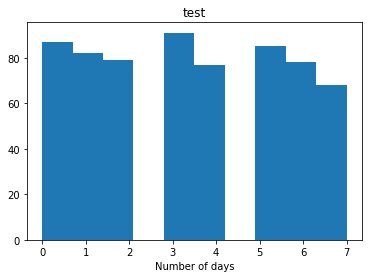

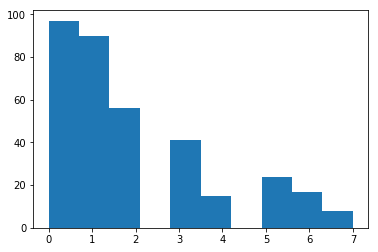

In [40]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(pass_days_account.values(), bins=10)
plt.xlabel('Number of days')
plt.title('test')
plt.show()
plt.hist(non_pass_days_account.values())
plt.show()

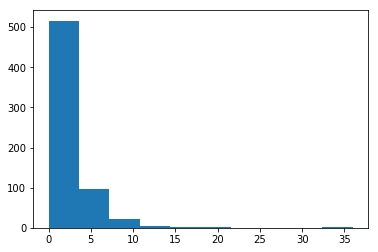

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

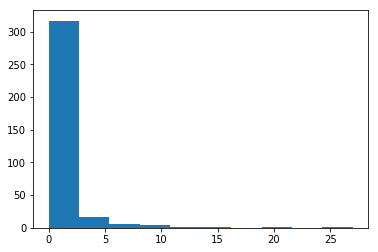

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(pass_lessons_completed_account.values())
plt.show()
plt.hist(nonpass_lessons_completed_account.values())

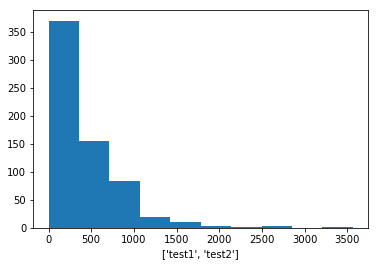

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

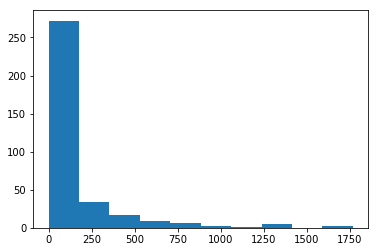

In [30]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(pass_minutes_account.values())
plt.xlabel(["test1", "test2"])
plt.show()
plt.hist(nonpass_minutes_account.values())

## 改进图表及分享发现

In [ ]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。